Prediction
===
1. Since the original data is too larget to manipulate, divide it into 20 subset and stored at Google drive.
2. basic preocesses:
   - load data
   - EDA
   - build model
   - predict public data, and upload as required
   



In [1]:
# download the subset
#
# 0, address: https://drive.google.com/file/d/1LOviPZ8AcTR9ViquQuhpqcO65MHdLDmp/view?usp=drive_link
# 1           1Oy1fJhk6J6Oxj39sNBQjIeL53G2bn2yP
# 2           1Z361kDgw-OjtC35b5dpZu5kjp9tWFq8s
# 3           1BDPBr55VYLrKTfI5LQQlcJs4RuBDViXE
# 4           18kQ2PYiaIXRxqp20jdCwWt1tC1S-F0nb
# 5           1w34TojDcX-AYUHDObdYoymhzAzLrE8zm
# 6           1yG_3XaO51dTK51CqXeEjr1LCeXwpaf2B
# 7.          1jIDbXH_NcX38649LL_Y0Tr9c8eOJespJ
# 8           1MpGvmWxA4brAxvieClkN_JxhCw1-SNEx
# 9           1iljgNk0Qx0rdUyhePFqdE9MbAeH6DjNo
# 10          1Gz6EyMboFDnaMKoSSSsiQo__VVjADMus
# 11          1VJskgjFP9RDQkkbJ_TP3JWunqQ8C9fwC
# 12          1ksRBpJ_lmUyyCJhRXz5xuD03Er5kUHwD
# 13          1TwSsBsjtyWAdzGYLm52aVWNvPalYwRgS
# 14          1iMNsT6HEroowOQUZ0l3fFhRV1AnnRdbW
# 15          1HgIMWZ1tzV6hE4FhR7EfmMA1SzUCpAlU
# 16          1lETHfiHNkVjS03MF2DYPTRgdjfBTBM9n
# 17          1vxYFraEyEX8K9_BLaG4SFC4vMZFaVkBI
# 18          1pVmBmRQrfFjh7u2TBS3JmcYgWm1YTo9o
# 19          12An9rskGdZajf7-WBThiqc8mzGXh2hWd
# 20          1Hbm9WHJrfqcM8-6DBNC0fRtfPgtkoyUy

share_="1LOviPZ8AcTR9ViquQuhpqcO65MHdLDmp"
url_head='https://drive.google.com/uc?id='

dwn_url=url_head+share_

In [2]:
!pip install -q gdown

In [3]:
import gdown

In [4]:
# download file and saved (in visual systemm)
# Remember download it and upload to your box
# change the link name

file_='traibing_0.csv.zip'
data=file_
gdown.download(dwn_url,data , quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1LOviPZ8AcTR9ViquQuhpqcO65MHdLDmp
From (redirected): https://drive.google.com/uc?id=1LOviPZ8AcTR9ViquQuhpqcO65MHdLDmp&confirm=t&uuid=d98fd0ea-fed6-4f27-8c4a-0d9b1046cb5c
To: /content/traibing_0.csv.zip
100%|██████████| 206M/206M [00:04<00:00, 43.8MB/s]


'traibing_0.csv.zip'

In [6]:
import pandas as pd

In [7]:
# load modified data
chunksize = 10 ** 8
#data="data/38_Training_Data_Set/training.csv"

#data="data/38_Training_Data_Set/train.zip"
for chunk in pd.read_csv(data, compression='zip',chunksize=chunksize):
    #process(chunk)
    print(chunk.shape)

(10000, 10214)


In [8]:
# refresh the cache memory
import gc
gc.collect()

118

EDA
---
1. delete 'ID'

In [9]:
# remove ID feature
# chunk = chunk.iloc[:, 1:]
chunk.drop(columns=['ID'], inplace=True)

In [10]:
target='飆股'
chunk.columns

Index(['外資券商_分點進出', '外資券商_分點買賣力', '外資券商_分點成交力(%)', '外資券商_分點吃貨比(%)',
       '外資券商_分點出貨比(%)', '外資券商_前1天分點進出', '外資券商_前1天分點買賣力', '外資券商_前1天分點成交力(%)',
       '外資券商_前1天分點吃貨比(%)', '外資券商_前1天分點出貨比(%)',
       ...
       '上市加權指數前15天成交量', '上市加權指數前16天成交量', '上市加權指數前17天成交量', '上市加權指數前18天成交量',
       '上市加權指數前19天成交量', '上市加權指數前20天成交量', '上市加權指數5天成交量波動度', '上市加權指數10天成交量波動度',
       '上市加權指數20天成交量波動度', '飆股'],
      dtype='object', length=10213)

In [11]:
# make distplot for 1st feature data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import warnings
warnings.filterwarnings('ignore')

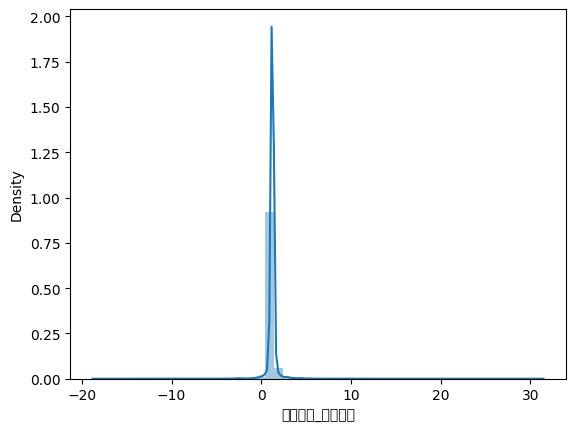

In [13]:
sns.distplot(chunk.iloc[:,0]);

In [14]:
# fill nan with -100
chunk.fillna(-100, inplace=True)

In [15]:
gc.collect()

6124

Model
---

In [43]:
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [17]:
chunk.head(2)

,外資券商_分點進出,外資券商_分點買賣力,外資券商_分點成交力(%),外資券商_分點吃貨比(%),外資券商_分點出貨比(%),外資券商_前1天分點進出,外資券商_前1天分點買賣力,外資券商_前1天分點成交力(%),外資券商_前1天分點吃貨比(%),外資券商_前1天分點出貨比(%),...,上市加權指數前15天成交量,上市加權指數前16天成交量,上市加權指數前17天成交量,上市加權指數前18天成交量,上市加權指數前19天成交量,上市加權指數前20天成交量,上市加權指數5天成交量波動度,上市加權指數10天成交量波動度,上市加權指數20天成交量波動度,飆股
0,1.2227,2.8303,1.2790,0.5707,0.5329,1.2219,1.2686,1.2255,0.5228,0.6429,...,0.3121,0.1312,0.2415,0.3157,0.4439,0.0533,0.1951,0.1357,0.2388,0
1,1.2297,2.8303,1.7995,1.1170,0.5329,1.2313,1.4432,1.2657,1.0660,0.6932,...,0.9439,0.7407,0.4615,0.4663,0.6618,0.1356,0.4063,0.5800,0.3199,0


In [45]:
# make lightgbm model on chunk_3 with target
# slpit train/test

target='飆股'

X = chunk.drop(columns=[target])
y = chunk[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# ref, https://chatgpt.com/c/67e3d943-dac8-800a-a2da-5c91e418dad3
# build lighbtgbm model
model = LGBMClassifier(
    boosting_type='gbdt',     # Standard boosting method, use 'dart' if you need more regularization
    num_leaves=128,           # Increase for large datasets, balance between performance & overfitting
    max_depth=-1,             # No depth limit, let num_leaves control complexity
    learning_rate=0.05,       # Start with 0.05; reduce if overfitting, increase for faster training
    n_estimators=1000,        # More trees (use early stopping)
    subsample=0.8,            # Row sampling for generalization
    colsample_bytree=0.8,     # Feature sampling to prevent overfitting
    colsample_bynode=0.8,     # Feature sampling per split for extra randomness
    feature_fraction=0.7,
    feature_pre_filter=False,
    min_child_samples=50,     # Minimum samples per leaf, higher for large datasets
    min_gain_to_split=0.1,
    reg_alpha=1.0,            # L1 regularization (tune if needed)
    reg_lambda=1.0,           # L2 regularization (tune if needed)
    importance_type='gain',    # Measures feature importance by split gain
    n_jobs=-1,                # Use all CPU cores
    random_state=42           # For reproducibility
)
model.fit(X_train, y_train)

[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number of positive: 47, number of negative: 6953
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.772410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2068144


Metrics
---

1. `Precision`: Precision is the ratio of true positives (TP) to the sum of true positives and false positives (FP):
Precision = TP / (TP + FP)

2. `Recall`: Recall is the ratio of true positives (TP) to the sum of true positives and false negatives (FN):
Recall = TP / (TP + FN)

3. `F1`-score: The F1-score is the harmonic mean of precision and recall:
$$F1 = 2  \frac{\text{Precision}\times \text{Recall}}{\text{Precision + Recall}}$$# build lighbtgbm model on chunk_4 with target
chunk_4 = chunk#.iloc[indices_2]

```
                        Data     
            Positive             Negative
        |-----------------------------------
     P  |  True Positive  |  False Positive
Predict |-----------------------------------
     N  |  False Negative |  True Negative
        |-----------------------------------
```
        

In [39]:
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy:  0.007333333333333333
F1 Score:  0.01455989410986102


Imbalance with undersampling
---
Minority/Majority too small to build a reasonable model, we use undersampling scheme.

In [21]:
# use smote undersampling to chunk
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [40]:
# undersampling chunk, with majority:minority=2:1
rus = RandomUnderSampler( random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [41]:
len(X_resampled),y_resampled.sum()

(138, np.int64(69))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [25]:
# build lighbtgbm model
model = LGBMClassifier(
    boosting_type='gbdt',     # Standard boosting method, use 'dart' if you need more regularization
    num_leaves=128,           # Increase for large datasets, balance between performance & overfitting
    max_depth=-1,             # No depth limit, let num_leaves control complexity
    learning_rate=0.05,       # Start with 0.05; reduce if overfitting, increase for faster training
    n_estimators=1000,        # More trees (use early stopping)
    subsample=0.8,            # Row sampling for generalization
    colsample_bytree=0.8,     # Feature sampling to prevent overfitting
    colsample_bynode=0.8,     # Feature sampling per split for extra randomness
    min_child_samples=50,     # Minimum samples per leaf, higher for large datasets
    reg_alpha=1.0,            # L1 regularization (tune if needed)
    reg_lambda=1.0,           # L2 regularization (tune if needed)
    importance_type='gain',    # Measures feature importance by split gain
    n_jobs=-1,                # Use all CPU cores
    random_state=42           # For reproducibility
)
model.fit(X_train, y_train)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 49, number of negative: 47
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 96, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510417 -> initscore=0.041673
[LightGBM] [Info] Start training from score 0.041673
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because the

LGBMClassifier(colsample_bynode=0.8, colsample_bytree=0.8,
               importance_type='gain', learning_rate=0.05, min_child_samples=50,
               n_estimators=1000, n_jobs=-1, num_leaves=128, random_state=42,
               reg_alpha=1.0, reg_lambda=1.0, subsample=0.8)

In [42]:
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy:  0.007333333333333333
F1 Score:  0.01455989410986102


In [ ]:
confusion_matrix(y_test, y_pred)

Note
---
We can save model aas file, and load while need:

```
# create a function to save model as pkl format
def save_model(model, filename):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
        print(f'{model} model saved as {filename}')
# create a function to load model from pkl format
def load_model(filename):
    with open(filename, 'rb') as f:
        model = pickle.load(f)
    print(f'{filename} model loaded')    
    return model

```

Prediction Submit
---

In [30]:
# https://drive.google.com/file/d/1zXjoJdmjPnDgoHEq0pn0Cpg4Mf61JB1x/view?usp=drive_link

share_pub="1zXjoJdmjPnDgoHEq0pn0Cpg4Mf61JB1x"
url_head='https://drive.google.com/uc?id='

public_file=url_head+share_pub

data_pub='public_x.csv.zip'

gdown.download(public_file , quiet=False)

# load modified data
chunksize = 10 ** 8
#data="data/38_Training_Data_Set/training.csv"

#data="data/38_Training_Data_Set/train.zip"
for chunk_ in pd.read_csv(data_pub, compression='zip',chunksize=chunksize):
    #process(chunk)
    print(chunk_.shape)

df_test=chunk_.drop(columns=['ID'])

Downloading...
From (original): https://drive.google.com/uc?id=1zXjoJdmjPnDgoHEq0pn0Cpg4Mf61JB1x
From (redirected): https://drive.google.com/uc?id=1zXjoJdmjPnDgoHEq0pn0Cpg4Mf61JB1x&confirm=t&uuid=7293082b-a6d6-41db-a6d3-dfa89cb98e60
To: /content/public_x.csv.zip
100%|██████████| 517M/517M [00:14<00:00, 36.0MB/s]


(25108, 10213)


In [31]:
df_test.fillna(-100, inplace=True)

In [32]:

y_pred = model.predict(df_test)

In [33]:
y_pred.sum()

np.int64(25108)

In [35]:
# template file, https://drive.google.com/file/d/17ZPnlr_ztbgPCPqlP7Mw64Yfmehkky_f/view?usp=drive_link

share_sumit="17ZPnlr_ztbgPCPqlP7Mw64Yfmehkky_f"
url_head='https://drive.google.com/uc?id='

template_file=url_head+share_sumit

data_sum='submission_template_public.csv'
gdown.download(template_file , quiet=False)


df_summit=pd.read_csv(data_sum)


Downloading...
From: https://drive.google.com/uc?id=17ZPnlr_ztbgPCPqlP7Mw64Yfmehkky_f
To: /content/submission_template_public.csv
100%|██████████| 265k/265k [00:00<00:00, 19.4MB/s]


In [36]:
df_summit[target]=y_pred

In [37]:
df_summit.to_csv('submission-1.csv', index=False)

Finally
---
Now you can sumit this prefiction, just completed.